## Churn Rate

### Week 01

**Churn Rate é a taxa de evasão de clientes, indica a perda de clientes ou receita em um determinado período de tempo.**

**Importando biblioteca e dados**

In [149]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

data_base = pd.read_json('https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json')

In [150]:
data_base.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


**Adicionando novas colunas**

In [151]:
func = lambda x: {
    'gender': x['gender'],
    'SeniorCitizen': x['SeniorCitizen'],
    'Partner': x['Partner'],
    'Dependents': x['Dependents'],
    'tenure': x['tenure']
}

new_cols = data_base['customer'].apply(func)

data_base_modified = pd.DataFrame(new_cols.to_list())

data_base = data_base.join(data_base_modified)
data_base = data_base.drop('customer', axis = 1)

data_base.head()

,customerID,Churn,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure
0,0002-ORFBO,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9
1,0003-MKNFE,No,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9
2,0004-TLHLJ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4
3,0011-IGKFF,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13
4,0013-EXCHZ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3


In [152]:
func = lambda x: {
    'PhoneService': x['PhoneService'],
    'MultipleLines': x['MultipleLines'],
    
}

new_cols = data_base['phone'].apply(func)

data_base_modified = pd.DataFrame(new_cols.to_list())

data_base = data_base.join(data_base_modified)
data_base = data_base.drop('phone', axis = 1)

data_base.head()

,customerID,Churn,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines
0,0002-ORFBO,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No
1,0003-MKNFE,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes
2,0004-TLHLJ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No
3,0011-IGKFF,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No
4,0013-EXCHZ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No


In [153]:
func = lambda x: {
    'InternetService': x['InternetService'],
    'OnlineSecurity': x['OnlineSecurity'],
    'OnlineBackup': x['OnlineBackup'],
    'DeviceProtection': x['DeviceProtection'],
    'TechSupport': x['TechSupport'],
    'StreamingTV': x['StreamingTV'],
    'StreamingMovies': x['StreamingMovies'],
    
}

new_cols = data_base['internet'].apply(func)

data_base_modified = pd.DataFrame(new_cols.to_list())

data_base = data_base.join(data_base_modified)
data_base = data_base.drop('internet', axis = 1)

data_base.head()

,customerID,Churn,account,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0002-ORFBO,No,"{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,No,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes
2,0004-TLHLJ,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No
3,0011-IGKFF,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,0013-EXCHZ,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No


In [154]:
func = lambda x: {
    'Contract': x['Contract'],
    'PaperlessBilling': x['PaperlessBilling'],
    'PaymentMethod': x['PaymentMethod'],
    'Charges': x['Charges'],
}

new_cols = data_base['account'].apply(func)

data_base_modified = pd.DataFrame(new_cols.to_list())

data_base = data_base.join(data_base_modified)
data_base = data_base.drop('account', axis = 1)

data_base.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [155]:
func = lambda x: {
    'Monthly': x['Monthly'],
    'Total': x['Total'],
}

new_cols = data_base['Charges'].apply(func)

data_base_modified = pd.DataFrame(new_cols.to_list())

data_base = data_base.join(data_base_modified)
data_base = data_base.drop('Charges', axis = 1)

data_base.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


**Verificando os dados**

In [156]:
data_base.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Monthly             float64
Total                object
dtype: object

In [157]:
NA_data = data_base.isna().sum().sum()
columns = data_base.shape[1]
lines = data_base.shape[0]

print(f'O numero de dados nulos na base de dados é de {NA_data} dados.')
print(f'O numero de linhas e colunas na tabela é de {lines} linhas e {columns} colunas.')

O numero de dados nulos na base de dados é de 0 dados.
O numero de linhas e colunas na tabela é de 7267 linhas e 21 colunas.


In [158]:
data_base.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total'],
      dtype='object')

**Traduzindo tabela**

In [159]:
rename_columns = {
    'customerID' : 'ID', 
    'Churn' : 'Churn', 
    'gender' : 'Gênero', 
    'SeniorCitizen' : 'Idade >= 65 anos', 
    'Partner' : 'Parceiro(a)',
    'Dependents' : 'Dependentes', 
    'tenure' : 'Meses de Contrato', 
    'PhoneService' : 'Serviço Tel', 
    'MultipleLines' : '+1 Linha de Tel',
    'InternetService' : 'Provedor de Internet', 
    'OnlineSecurity' : 'Segurança online', 
    'OnlineBackup' : 'Backup Online', 
    'DeviceProtection' : 'Proteção de Aplicativo',
    'TechSupport' : 'Suporte técnico', 
    'StreamingTV' : 'TV a cabo', 
    'StreamingMovies' : 'Streaming de filmes', 
    'Contract' : 'Contrato',
    'PaperlessBilling' : 'Fatura online', 
    'PaymentMethod' : 'Forma de pagamento', 
    'Monthly' : '$ Serviços por mês', 
    'Total' : '$ Total'
}

In [160]:
data_base = data_base.rename(columns = rename_columns)

In [161]:
data_base.columns

Index(['ID', 'Churn', 'Gênero', 'Idade >= 65 anos', 'Parceiro(a)',
       'Dependentes', 'Meses de Contrato', 'Serviço Tel', '+1 Linha de Tel',
       'Provedor de Internet', 'Segurança online', 'Backup Online',
       'Proteção de Aplicativo', 'Suporte técnico', 'TV a cabo',
       'Streaming de filmes', 'Contrato', 'Fatura online',
       'Forma de pagamento', '$ Serviços por mês', '$ Total'],
      dtype='object')

In [162]:
data_base.head()

,ID,Churn,Gênero,Idade >= 65 anos,Parceiro(a),Dependentes,Meses de Contrato,Serviço Tel,+1 Linha de Tel,Provedor de Internet,...,Backup Online,Proteção de Aplicativo,Suporte técnico,TV a cabo,Streaming de filmes,Contrato,Fatura online,Forma de pagamento,$ Serviços por mês,$ Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [163]:
data_base['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [164]:
Translate_yes_no = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

Translate_gender = {
    'Female' : 'Feminino', 
    'Male' : 'Masculino'
}

Translate_MultipleLines = {
    'No' : 'Não',
    'Yes' : 'Sim',
    'No phone service' : 'Sem serviço de telefone'
}

Translate_InternetService = {
    'DSL' : 'DSL', 
    'Fiber optic' : 'Fibra óptica', 
    'No' : 'Não'
}

Translate_OnlineSecurity = {
    'No' : 'Não',
    'Yes' : 'Sim',
    'No internet service' : 'Sem serviço de internet'
}

Translate_Contract = {
    'One year' : '1 Ano', 
    'Month-to-month' : 'Mês a mês', 
    'Two year' : '2 Anos'
}

Translate_PaymentMethod = {
    'Mailed check' : 'Cheque enviado por correio',
    'Electronic check' : 'Cheque eletrônico',
    'Credit card (automatic)' : 'Cartão de crédito (automático)',
    'Bank transfer (automatic)' : 'Transferência bancária (automática)'
}

In [165]:
def translate(column, translater):
    data_base[column] = data_base[column].map(translater)
    return data_base[column].unique()

In [166]:
translate('Churn', Translate_yes_no)

array(['Não', 'Sim', nan], dtype=object)

In [167]:
translate('Gênero', Translate_gender)

array(['Feminino', 'Masculino'], dtype=object)

In [168]:
translate('Parceiro(a)', Translate_yes_no)

array(['Sim', 'Não'], dtype=object)

In [169]:
translate('Dependentes', Translate_yes_no)

array(['Sim', 'Não'], dtype=object)

In [170]:
translate('Serviço Tel', Translate_yes_no)

array(['Sim', 'Não'], dtype=object)

In [171]:
translate('+1 Linha de Tel', Translate_MultipleLines)

array(['Não', 'Sim', 'Sem serviço de telefone'], dtype=object)

In [172]:
translate('Provedor de Internet', Translate_InternetService)

array(['DSL', 'Fibra óptica', 'Não'], dtype=object)

In [173]:
translate('Segurança online', Translate_OnlineSecurity)

array(['Não', 'Sim', 'Sem serviço de internet'], dtype=object)

In [174]:
translate('Backup Online', Translate_OnlineSecurity)

array(['Sim', 'Não', 'Sem serviço de internet'], dtype=object)

In [175]:
translate('Proteção de Aplicativo', Translate_OnlineSecurity)

array(['Não', 'Sim', 'Sem serviço de internet'], dtype=object)

In [176]:
translate('Suporte técnico', Translate_OnlineSecurity)

array(['Sim', 'Não', 'Sem serviço de internet'], dtype=object)

In [177]:
translate('TV a cabo', Translate_OnlineSecurity)

array(['Sim', 'Não', 'Sem serviço de internet'], dtype=object)

In [178]:
translate('Streaming de filmes', Translate_OnlineSecurity)

array(['Não', 'Sim', 'Sem serviço de internet'], dtype=object)

In [179]:
translate('Contrato', Translate_Contract)

array(['1 Ano', 'Mês a mês', '2 Anos'], dtype=object)

In [180]:
translate('Fatura online', Translate_yes_no)

array(['Sim', 'Não'], dtype=object)

In [181]:
translate('Forma de pagamento', Translate_PaymentMethod)

array(['Cheque enviado por correio', 'Cheque eletrônico',
       'Cartão de crédito (automático)',
       'Transferência bancária (automática)'], dtype=object)

In [182]:
data_base.head()

,ID,Churn,Gênero,Idade >= 65 anos,Parceiro(a),Dependentes,Meses de Contrato,Serviço Tel,+1 Linha de Tel,Provedor de Internet,...,Backup Online,Proteção de Aplicativo,Suporte técnico,TV a cabo,Streaming de filmes,Contrato,Fatura online,Forma de pagamento,$ Serviços por mês,$ Total
0,0002-ORFBO,Não,Feminino,0,Sim,Sim,9,Sim,Não,DSL,...,Sim,Não,Sim,Sim,Não,1 Ano,Sim,Cheque enviado por correio,65.6,593.3
1,0003-MKNFE,Não,Masculino,0,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Não,Sim,Mês a mês,Não,Cheque enviado por correio,59.9,542.4
2,0004-TLHLJ,Sim,Masculino,0,Não,Não,4,Sim,Não,Fibra óptica,...,Não,Sim,Não,Não,Não,Mês a mês,Sim,Cheque eletrônico,73.9,280.85
3,0011-IGKFF,Sim,Masculino,1,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Sim,Não,Sim,Sim,Mês a mês,Sim,Cheque eletrônico,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,1,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Não,Sim,Sim,Não,Mês a mês,Sim,Cheque enviado por correio,83.9,267.4


In [183]:
data_base = data_base.dropna()

In [184]:
print(f'O numero de dados nulos na base de dados é de {NA_data} dados.')
print(f'O numero de linhas e colunas na tabela é de {lines} linhas e {columns} colunas.')

O numero de dados nulos na base de dados é de 0 dados.
O numero de linhas e colunas na tabela é de 7267 linhas e 21 colunas.


In [185]:
data_base['$ Total'] = data_base['$ Total'].replace(' ', np.nan)

In [186]:
data_base['$ Total'] = data_base['$ Total'].astype(float)

In [187]:
data_base['$ Total'] = data_base['$ Total'].dropna()

In [188]:
print(f'O numero de dados nulos na base de dados é de {NA_data} dados.')
print(f'O numero de linhas e colunas na tabela é de {lines} linhas e {columns} colunas.')

O numero de dados nulos na base de dados é de 0 dados.
O numero de linhas e colunas na tabela é de 7267 linhas e 21 colunas.


In [189]:
data_base['$ Total por dia'] = data_base['$ Total'] / 30

In [190]:
data_base['$ Total por dia'] = round(data_base['$ Total por dia'], 2)

In [191]:
data_base = data_base.dropna()

In [192]:
data_base.head()

,ID,Churn,Gênero,Idade >= 65 anos,Parceiro(a),Dependentes,Meses de Contrato,Serviço Tel,+1 Linha de Tel,Provedor de Internet,...,Proteção de Aplicativo,Suporte técnico,TV a cabo,Streaming de filmes,Contrato,Fatura online,Forma de pagamento,$ Serviços por mês,$ Total,$ Total por dia
0,0002-ORFBO,Não,Feminino,0,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,1 Ano,Sim,Cheque enviado por correio,65.6,593.30,19.78
1,0003-MKNFE,Não,Masculino,0,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mês a mês,Não,Cheque enviado por correio,59.9,542.40,18.08
2,0004-TLHLJ,Sim,Masculino,0,Não,Não,4,Sim,Não,Fibra óptica,...,Sim,Não,Não,Não,Mês a mês,Sim,Cheque eletrônico,73.9,280.85,9.36
3,0011-IGKFF,Sim,Masculino,1,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Não,Sim,Sim,Mês a mês,Sim,Cheque eletrônico,98.0,1237.85,41.26
4,0013-EXCHZ,Sim,Feminino,1,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Sim,Sim,Não,Mês a mês,Sim,Cheque enviado por correio,83.9,267.40,8.91


### Week 02

#### Realizando análises visuais

##### Analisando o Churn com o gênero

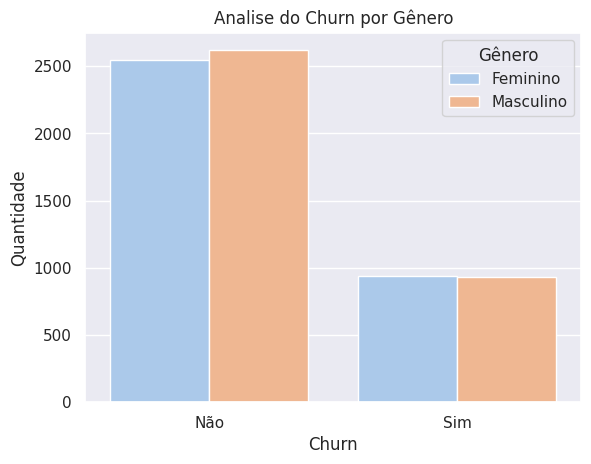

In [193]:
sns.set_style('darkgrid')
sns.set_palette('pastel')

graph_genders = sns.countplot(x = 'Churn',hue = 'Gênero', data = data_base) 

graph_genders.set_title('Analise do Churn por Gênero')
graph_genders.set_xlabel('Churn')
graph_genders.set_ylabel('Quantidade')

plt.show()

##### Analisando o Churn com o tempo de contrato

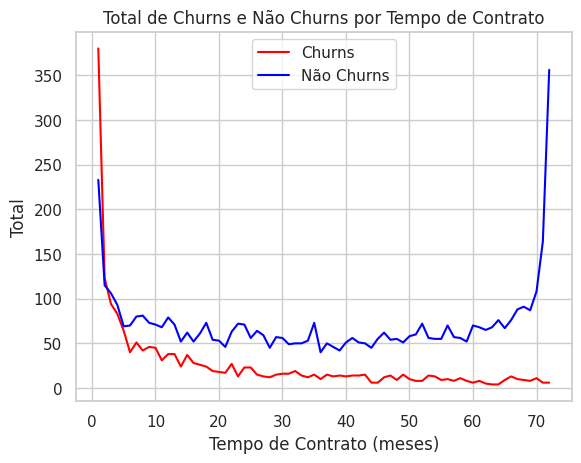

In [194]:
Contract_churn = data_base[['ID', 'Churn', 'Meses de Contrato']].pivot_table(index = 'Meses de Contrato', columns = 'Churn', values = 'ID', aggfunc = 'count').reset_index()

Contract_churn.columns = ['Meses de Contrato', 'Total_nao_churns', 'Total_churns']

sns.set(style="whitegrid")

sns.lineplot(x = "Meses de Contrato", y = "Total_churns", data = Contract_churn, color="red", label="Churns")
sns.lineplot(x = "Meses de Contrato", y = "Total_nao_churns", data = Contract_churn, color="blue", label="Não Churns")

plt.title("Total de Churns e Não Churns por Tempo de Contrato")
plt.xlabel("Tempo de Contrato (meses)")
plt.ylabel("Total")

plt.legend()

plt.show()

##### Analisando o valor do serviço mensal

/tmp/ipykernel_6710/553110444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_base['Churn_realizado'] = new_data_base['Churn'].map({'Sim' : 1, 'Não' : 0})
/tmp/ipykernel_6710/553110444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_base['Churn_nao_realizado'] = new_data_base['Churn'].map({'Sim' : 0, 'Não' : 1})


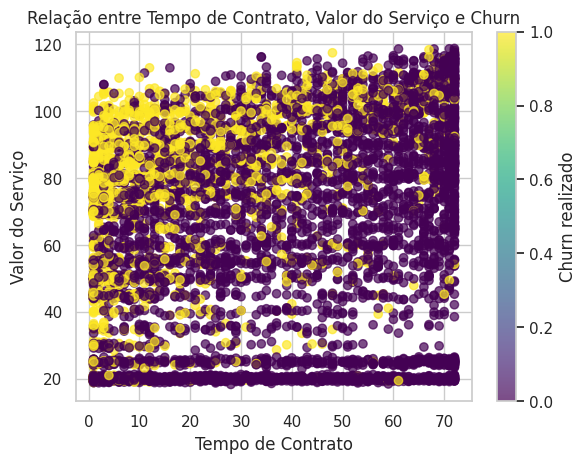

In [195]:
new_data_base = data_base[['ID', 'Churn', 'Meses de Contrato', '$ Serviços por mês']]
new_data_base['Churn_realizado'] = new_data_base['Churn'].map({'Sim' : 1, 'Não' : 0})
new_data_base['Churn_nao_realizado'] = new_data_base['Churn'].map({'Sim' : 0, 'Não' : 1})

plt.scatter(new_data_base['Meses de Contrato'], new_data_base['$ Serviços por mês'], c = new_data_base['Churn_realizado'], cmap = 'viridis', alpha=0.7)
plt.colorbar(label='Churn realizado')

plt.xlabel('Tempo de Contrato')
plt.ylabel('Valor do Serviço')
plt.title('Relação entre Tempo de Contrato, Valor do Serviço e Churn')
plt.show()